# <center>R5.A.11 - Méthodes d'optimisation <br> TP1a - Recuit Simulé</center>


 <center>      <i> Tom Ferragut, Thibault Godin </i> <br> <i>IUT de Vannes, BUT Informatique </i> </center>


### imports


In [1]:
import ipywidgets as widgets
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import time

from ipywidgets import interact

# Affichage graphique
#%matplotlib notebook 
# enable interactivity of plots
# attention a bien fermer les fenetres plt après chaque visualisalgèbreation
%matplotlib inline


## Vocabulaire et intuition

La méthode du recuit simulé (en anglais _simulated annealing_) a été proposée en informatique dans les années 80, par analogie avec une technique dite du recuit, utilisée en science de matériaux et en particulier en sidérurgie.

Il s'agit d'un principe général de construction d'algorithmes pour résoudre des problèmes d'optimisation difficiles.

Cette métaheuristique est assez bien comprise, d'un point de vue théorique, et permet la création d'algorithmes relativement simples. 

Soit un problème d'optimisation combinatoire où l'on a 


- un ensemble de configuration $\Omega = \{w_1,...,w_N\}$

- une fonction de coût (aussi appelée fonction d'energie) $c:\Omega \to \mathbb{R}_+$

- une fonction de voisinage $V:\Omega \to \mathcal{P}(\Omega)$



La méthode du recuit simulé vise à trouver la configuration de coût (energie) minimal.


La méthode est alors assez intuitive : 

Au départ on commence avec une configuration arbitraire. 

Soit $w$ la configuration courante. 

À chaque itération, une configuration candidate $w'$ est choisie uniformément dans le voisinage de la solution courante ; et acceptée avec une probabilité $\min( 1, e^{-\frac{c(w) -c(w')}{T}})$

Le paramètre $T$ s’appelle la _température_ et tend vers $0$ (de manière
monotone), selon une fonction appelée _loi de décroissance de la température_. La meilleure solution rencontrée durant l’exécution de l’algorithme est mémorisée et écrite lorsque la condition d’arrêt choisie est vérifiée.

## 1 - Optimisation de fonctions 1D

On va commencer par des exemples simples : des fonctions $f : \: \mathbb{R} \to \mathbb{R}$ (comme l'an dernier en R4.04), et pour débuter la fonction définie par $f(x) = x^2 -1$.

Pour fonction de voisinage, on prendra comme transition la loi uniforme sur $[-0.5, 0,5]$ (ce choix est arbitraire mais malheureusement a un impact non négligeable sur la vitesse de convergence).

Contrairement à la méthode de gradient de l'an dernier, la recherche n'est pas dirigée mais ressemble plus à une marche au hasard. 

Avantage : simplicité (pas de dérivée à calculer, moins de conditions)

Inconvénient : on exploite pas du tout la structure locale de la fonction.

> __Question 1__ : Bien lire le code donné ci-dessous, le comprendre et le commenter

In [11]:
def f(x):
    # fonction simple à tester
    # minimum théorique f(0)=-1
    return x**2 - 1

# the energy function is the function itself
def energy(x):
    return f(x)
  
# we pick a random point nearby the current position
def neighbour(x):
    return x + random.uniform(-0.5, 0.5)

def simulated_annealing(initial_x, max_iterations, initial_temperature, cooling_rate):
    current_x = initial_x
    current_energy = energy(current_x)
    temperature = initial_temperature

    for _ in range(max_iterations):
        # Generate a neighboring solution
        new_x = neighbour(current_x)
        new_energy = energy(new_x)

        # Calculate the change in energy
        delta_energy = new_energy - current_energy

        # Accept the new solution if it's better or with a certain probability
        if delta_energy < 0 or random.random() < math.exp(-delta_energy / temperature):
            current_x = new_x
            current_energy = new_energy

        # Cool down the temperature
        temperature *= cooling_rate

    return current_x, f(current_x)

# initial_x = random.uniform(-10, 10)
initial_x = math.pi
max_iterations = 1000
initial_temperature = 1.0
cooling_rate = 0.99

min_x, min_value = simulated_annealing(initial_x, max_iterations, initial_temperature, cooling_rate)

print(f"Minimum value found at x = {min_x}, f(x) = {min_value}")


Minimum value found at x = 0.0003205925384268671, f(x) = -0.9999998972204243


Cette fonction marche plutôt bien, mais on n'a pas trop d'idée de ce qui s'est passé.
On va donc la réécrire en conservant l'historique (et en ajoutant des widgets pour essayer de mieux comprendre ce qui se passe.

In [12]:
def simulated_annealing(initial_x, max_iterations, initial_temperature, cooling_rate):
    current_x = initial_x
    current_energy = energy(current_x)
    temperature = initial_temperature

    x_values = [current_x]
    energy_values = [current_energy]

    for _ in range(max_iterations):
        new_x = neighbour(current_x)
        new_energy = energy(new_x)

        delta_energy = new_energy - current_energy

        if delta_energy < 0 or random.random() < math.exp(-delta_energy / temperature):
            current_x = new_x
            current_energy = new_energy

        temperature *= cooling_rate

        x_values.append(current_x)
        energy_values.append(current_energy)

    return x_values, energy_values

def plot_simulated_annealing(initial_temperature, cooling_rate):
    # initial_x = random.uniform(-10, 10)
    initial_x = 10
    # fixed for comparaisons    
    max_iterations = 100
    cmap = plt.get_cmap('viridis')

    x_values, energy_values = simulated_annealing(initial_x, max_iterations, initial_temperature, cooling_rate)

    # Plot the function curve and the current state
    x = np.arange(-15, 15,0.01)
    y = [f(xi) for xi in x]

    plt.figure(figsize=(12, 12))
    plt.subplot(2, 1, 1)

    plt.plot(x, y, label="Function Curve")
    plt.scatter(x_values, [f(xi) for xi in x_values], c=range(len(x_values)), cmap=cmap, label="Current State", marker='o')
    plt.title("Simulated Annealing Optimization")
    plt.xlabel('x')
    plt.ylabel("f(x)")
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(energy_values, label='x')
    plt.title("Energy")
    plt.xlabel("Iteration")
    plt.ylabel('x')

    plt.tight_layout()
    plt.show()

interact(
    plot_simulated_annealing,
    initial_temperature=widgets.FloatSlider(min=0.01, max=10.0, step=0.01, value=1.0, description="Initial Temp."),
    cooling_rate=widgets.FloatSlider(min=0.90, max=0.9999, step=0.0001, value=0.99, description="Cooling Rate")
)


interactive(children=(FloatSlider(value=1.0, description='Initial Temp.', max=10.0, min=0.01, step=0.01), Floa…

<function __main__.plot_simulated_annealing(initial_temperature, cooling_rate)>

> __Question 2__ : Essayer de modifier l'algorithme en prenant comme fonction de voisinage un point aléatoire de $[-15,15]$ (plutôt qu'un réél voisin). Que constatez-vous ?

1. Exploration plus large : Comme chaque nouveau candidat est pris de manière aléatoire sur l'intervalle global, l'algorithme explore l'ensemble de l'espace de manière plus agressive, sans se focaliser sur la région actuelle. Cela a deux conséquences :
- Si la température est suffisamment élevée au début, cela permet à l'algorithme de trouver de meilleurs minima globaux.
- Toutefois, l'algorithme peut ne pas converger efficacement vers une solution, car il manque une structure locale dans l'exploration.
2. Convergence plus lente : Comme l'algorithme ne s'appuie plus sur une progression locale, la convergence est plus erratique, et le nombre d'itérations pour trouver une solution optimale augmente.
3. Acceptation des solutions sous-optimales : Si la température décroît trop rapidement, l'algorithme risque de ne pas explorer efficacement toutes les solutions globales, car il accepte moins souvent des solutions sous-optimales éloignées de la solution actuelle.

In [13]:
# we pick a random point in [-15,15]
def neighbour(x):
    return random.uniform(-15, 15)

initial_x = neighbour(15)
max_iterations = 1000
initial_temperature = 1.0
cooling_rate = 0.99

min_x, min_value = simulated_annealing(initial_x, max_iterations, initial_temperature, cooling_rate)
interact(
    plot_simulated_annealing,
    initial_temperature=widgets.FloatSlider(min=0.01, max=10.0, step=0.01, value=1.0, description="Initial Temp."),
    cooling_rate=widgets.FloatSlider(min=0.90, max=0.9999, step=0.0001, value=0.99, description="Cooling Rate")
)


interactive(children=(FloatSlider(value=1.0, description='Initial Temp.', max=10.0, min=0.01, step=0.01), Floa…

<function __main__.plot_simulated_annealing(initial_temperature, cooling_rate)>

> __Question 3__ : Expliquez ce que changent les paramètres `initial_temperature` et `cooling_rate` dans le comportement de l'algorithme.
Tester l'algorithme fourni sur les différentes fonctions à optimiser proposées.

### 1. **Température Initiale (`initial_temperature`)**

La température initiale détermine la probabilité d'acceptation des solutions sous-optimales au début de l'algorithme.

- **Température élevée :** Lorsque la température est élevée, l'algorithme accepte plus facilement des solutions moins bonnes que la solution actuelle (c'est-à-dire celles avec une énergie plus élevée). Cela permet à l'algorithme d'explorer une large zone de l'espace des solutions, ce qui est utile pour éviter de tomber trop tôt dans un minimum local. Plus la température initiale est élevée, plus l'algorithme commence par une phase de grande exploration.
  
- **Température faible :** Si la température initiale est faible, l'algorithme devient plus "conservateur" dès le départ, acceptant seulement les solutions meilleures ou légèrement moins bonnes. Cela peut accélérer la convergence vers une solution, mais augmente le risque de rester bloqué dans un minimum local sans explorer suffisamment l'espace de recherche.

### 2. **Taux de Refroidissement (`cooling_rate`)**

Le taux de refroidissement contrôle la vitesse à laquelle la température diminue au fil des itérations. Plus précisément, à chaque itération, la température est multipliée par le `cooling_rate`, ce qui entraîne une décroissance exponentielle de la température.

- **Taux de refroidissement élevé (proche de 1) :** Un taux proche de 1 signifie que la température décroît lentement. Cela permet à l'algorithme de continuer à accepter des solutions sous-optimales plus longtemps, prolongeant ainsi la phase d'exploration. Un taux de refroidissement lent peut aider l'algorithme à explorer plus en profondeur et à éviter de tomber dans des minima locaux, mais cela peut également ralentir la convergence vers la solution optimale.
  
- **Taux de refroidissement faible (proche de 0.90) :** Si le taux de refroidissement est plus faible, la température décroît rapidement. Cela signifie que l'algorithme devient rapidement plus strict quant à l'acceptation des solutions sous-optimales, favorisant une convergence rapide vers une solution proche du minimum local. Cependant, cela augmente le risque de rater des opportunités d'amélioration globale, surtout dans des espaces de recherche complexes.

### Observation sur différentes fonctions à optimiser

Voici une analyse des effets des paramètres pour les différentes fonctions de test mentionnées dans le code :

#### 1. **$f(x) = x^2 - 1$** (parabolique)
- **Caractéristiques :** Cette fonction a un minimum global clair en $x = 0$.
- **Comportement de l'algorithme :** 
  - Avec une **température initiale élevée**, l'algorithme explore bien l'espace avant de converger rapidement vers $x = 0$.
  - Avec un **taux de refroidissement élevé**, l'exploration sera plus lente et il est peu probable que l'algorithme reste bloqué dans des solutions sous-optimales.
  - Une **température faible** ou un **taux de refroidissement rapide** conduira à une convergence rapide, mais potentiellement plus risquée si l'algorithme commence loin du minimum.

#### 2. **$f(x) = -(x + \sin(x)) \cdot e^{-x^2}$** (complexe)
- **Caractéristiques :** Cette fonction a des crêtes et des vallées multiples, ce qui en fait un bon exemple de fonction avec de nombreux minima locaux.
- **Comportement de l'algorithme :** 
  - Une **température initiale élevée** est essentielle pour permettre à l'algorithme d'explorer différents minima locaux et d'éviter de tomber prématurément dans l'un d'entre eux.
  - Un **taux de refroidissement élevé** est également bénéfique, car il maintient la température suffisamment longtemps pour que l'algorithme puisse s'échapper des minima locaux et trouver le minimum global.
  - Si la température baisse trop rapidement, l'algorithme peut facilement se retrouver piégé dans l'un des nombreux minima locaux.

#### 3. **$f(x) = \sin(x) + \sin\left(\frac{10}{3} \cdot x\right)$** (oscillatoire)
- **Caractéristiques :** Cette fonction présente des oscillations fréquentes avec de nombreux maxima et minima locaux.
- **Comportement de l'algorithme :** 
  - Une **température initiale élevée** et un **taux de refroidissement lent** sont cruciaux pour éviter que l'algorithme ne se retrouve bloqué dans les nombreux minima locaux.
  - Des paramètres trop conservateurs (température basse et refroidissement rapide) risquent de faire converger l'algorithme vers un minimum local sans explorer d'autres régions plus prometteuses.

### Conclusion

- **Température initiale élevée** et **taux de refroidissement lent** favorisent une exploration plus approfondie de l'espace de solutions, ce qui est utile pour les fonctions avec plusieurs minima locaux.
- **Température initiale faible** et **taux de refroidissement rapide** mènent à une convergence plus rapide, mais risquent de piéger l'algorithme dans des minima locaux si l'espace de recherche est complexe.

Le choix optimal des paramètres dépend donc de la nature de la fonction à optimiser et de la nécessité d'explorer l'espace de solutions en profondeur ou de converger rapidement.


In [17]:
def f_2(x, function_choice):
    if function_choice == 1:
        # parabole simple
        return x**2 - 1
    elif function_choice == 2:
        # fonction complexe avec minima locaux
        return -(x + math.sin(x)) * math.exp(-x**2)
    elif function_choice == 3:
        # fonction oscillatoire avec plusieurs minima
        return math.sin(x) + math.sin((10.0 / 3.0) * x)

# Fonction d'énergie pour l'algorithme
def energy_2(x, function_choice):
    return f_2(x, function_choice)

# Fonction de voisinage : reste à déterminer si c'est local ou global
def neighbour_2(x):
    # Génère un voisin dans [-15, 15] (ajustable)
    return random.uniform(-15, 15)

# Algorithme de recuit simulé avec conservation de l'historique
def simulated_annealing_2(initial_x, max_iterations, initial_temperature, cooling_rate, function_choice):
    current_x = initial_x
    current_energy = energy_2(current_x, function_choice)
    temperature = initial_temperature

    x_values = [current_x]
    energy_values = [current_energy]

    for _ in range(max_iterations):
        new_x = neighbour_2(current_x)
        new_energy = energy_2(new_x, function_choice)

        delta_energy = new_energy - current_energy

        if delta_energy < 0 or random.random() < math.exp(-delta_energy / temperature):
            current_x = new_x
            current_energy = new_energy

        temperature *= cooling_rate

        x_values.append(current_x)
        energy_values.append(current_energy)

    return x_values, energy_values

# Fonction de traçage pour voir l'évolution du recuit simulé
def plot_simulated_annealing_2(initial_temperature, cooling_rate, function_choice):
    initial_x = 10  # Point de départ arbitraire pour comparaison
    max_iterations = 100
    cmap = plt.get_cmap("viridis")

    # Effectuer le recuit simulé
    x_values, energy_values = simulated_annealing_2(initial_x, max_iterations, initial_temperature, cooling_rate, function_choice)

    # Tracé de la courbe de la fonction et des points visités
    x = np.arange(-15, 15, 0.01)
    y = [f_2(xi, function_choice) for xi in x]

    plt.figure(figsize=(12, 12))

    # Premier sous-graphique : la fonction et les points visités
    plt.subplot(2, 1, 1)
    plt.plot(x, y, label="Function Curve")
    plt.scatter(x_values, [f_2(xi, function_choice) for xi in x_values], c=range(len(x_values)), cmap=cmap, label="Current State", marker='o')
    plt.title("Simulated Annealing Optimization")
    plt.xlabel('x')
    plt.ylabel("f(x)")
    plt.legend()

    # Deuxième sous-graphique : l'évolution de l'énergie
    plt.subplot(2, 1, 2)
    plt.plot(energy_values, label="Energy")
    plt.title("Energy Over Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Energy")

    plt.tight_layout()
    plt.show()

# Widget pour tester avec différentes températures et fonctions
interact(
    plot_simulated_annealing_2,
    initial_temperature=widgets.FloatSlider(min=0.01, max=5.0, step=0.01, value=1.0, description="Initial Temp."),
    cooling_rate=widgets.FloatSlider(min=0.90, max=0.9999, step=0.0001, value=0.99, description="Cooling Rate"),
    function_choice=widgets.IntSlider(min=1, max=3, step=1, value=1, description="Function Choice")
)


interactive(children=(FloatSlider(value=1.0, description='Initial Temp.', max=5.0, min=0.01, step=0.01), Float…

<function __main__.plot_simulated_annealing_2(initial_temperature, cooling_rate, function_choice)>

## 2 - Optimisation d'une fonction 2D

A vous d'optimiser une fonction, cette fois en 2 dimension

In [19]:
from mpl_toolkits.mplot3d import Axes3D 

cmap_reversed = plt.colormaps.get_cmap("RdBu_r")

def f(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def f(X):
    x, y = X  # Permet de récupérer chacun des éléments de X dans une variable différente.
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2


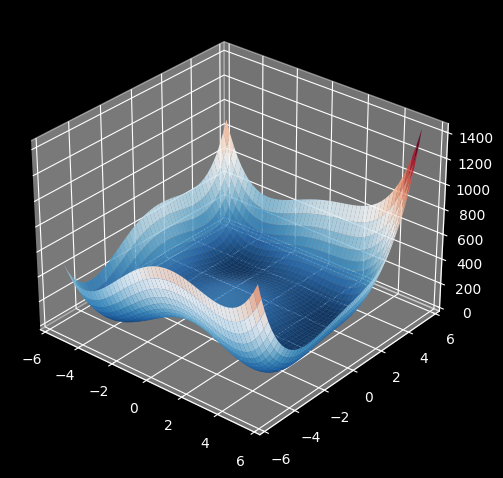

In [20]:
X, Y = np.meshgrid(np.linspace(-5.5, 5.5, 50),
                   np.linspace(-5.5, 5.5, 50))
Z = f([X, Y])  # Altitude


fig = plt.figure()
ax = plt.axes(projection="3d")
ax.view_init(30, -50)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, edgecolor="none", alpha=0.9, cmap=cmap_reversed)

plt.tight_layout()
plt.show()


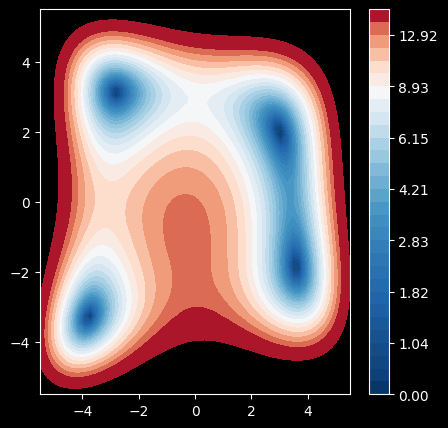

In [21]:
# vue du dessus pour augmenter la lisbilité
# passage à la racine carrée pour les même raisons
X, Y = np.meshgrid(np.linspace(-5.5, 5.5, 50),
                   np.linspace(-5.5, 5.5, 50))
levels = list(1.7 ** np.linspace(0, 10, 30) - 1.) + [300]
plt.figure(figsize=(5, 5))
plt.contourf(X, Y, np.sqrt(Z), levels=np.sqrt(levels), cmap=cmap_reversed)
plt.colorbar()
plt.show()


> __Question 1__ : écrire une fonction effectuant la recherche de minimum par la méthode du recuit simulé

In [22]:
# Fonction d'énergie (même que f dans notre cas)
def energy(X):
    return f(X)

# Génère un voisin aléatoire proche de la position actuelle
def neighbour(X):
    x, y = X
    new_x = x + random.uniform(-0.5, 0.5)  # Variation dans une petite plage autour de x
    new_y = y + random.uniform(-0.5, 0.5)  # Variation dans une petite plage autour de y
    return [new_x, new_y]


In [23]:
# Algorithme de recuit simulé pour une fonction 2D
def simulated_annealing2D(initial_X, max_iterations, initial_temperature, cooling_rate):
    current_X = initial_X
    current_energy = energy(current_X)
    temperature = initial_temperature

    X_values = [current_X]  # Historique des positions
    energy_values = [current_energy]  # Historique des énergies

    for iteration in range(max_iterations):
        # Générer une nouvelle solution candidate
        new_X = neighbour(current_X)
        new_energy = energy(new_X)

        # Calculer la différence d'énergie
        delta_energy = new_energy - current_energy

        # Accepter la nouvelle solution si elle est meilleure ou avec une probabilité
        if delta_energy < 0 or random.random() < math.exp(-delta_energy / temperature):
            current_X = new_X
            current_energy = new_energy

        # Refroidissement de la température
        temperature *= cooling_rate

        # Enregistrer l'historique
        X_values.append(current_X)
        energy_values.append(current_energy)

    return X_values, energy_values


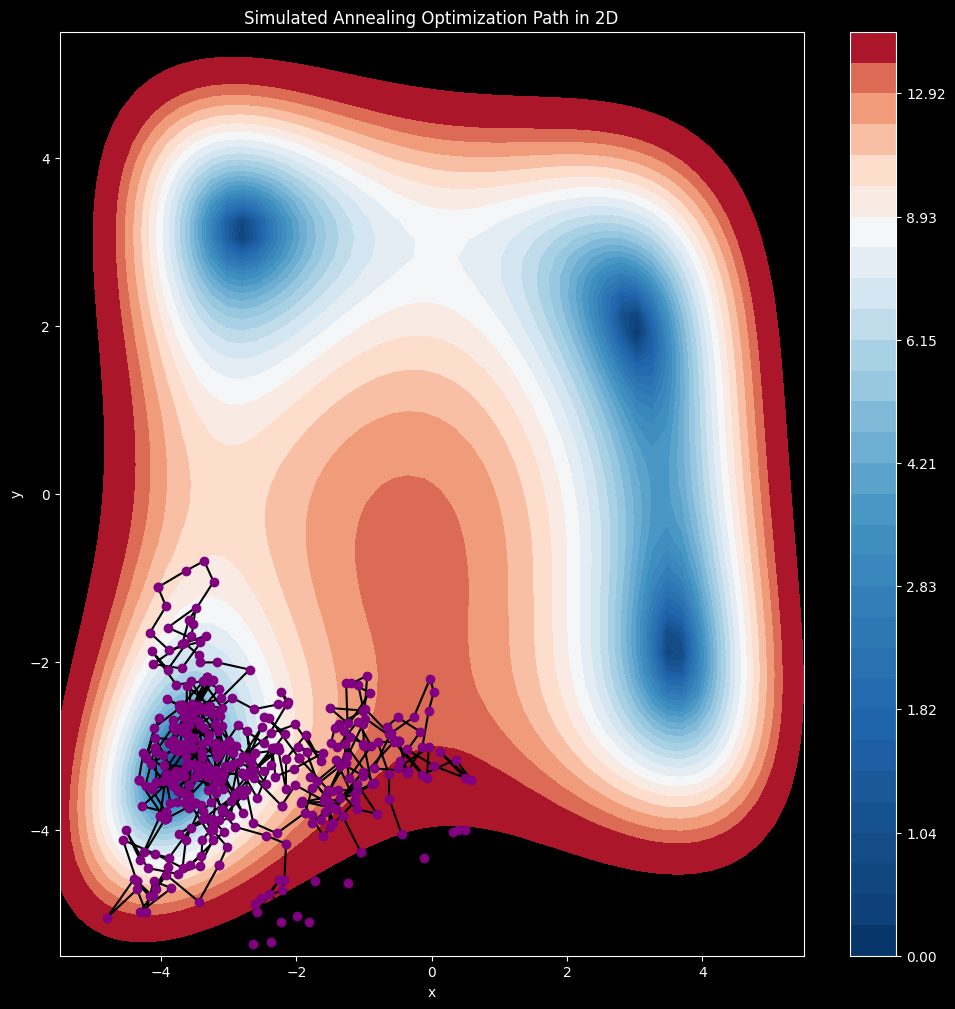

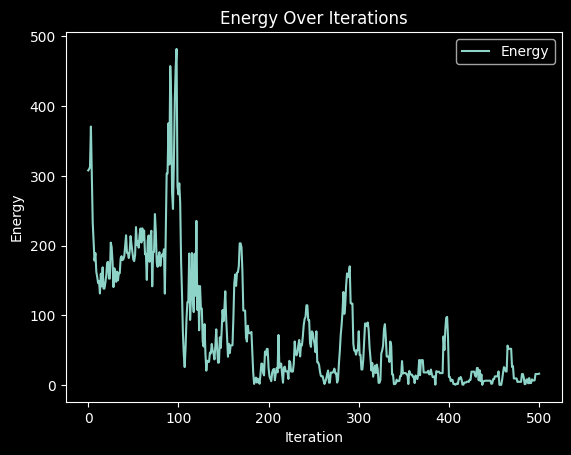

In [24]:
X,Y = np.meshgrid(np.linspace(-5.5, 5.5, 50), np.linspace(-5.5, 5.5, 50))

# Fonction pour tracer les résultats
def plot_simulated_annealing2D(x0, y0, max_iterations, initial_temperature, cooling_rate):
    X, Y = np.meshgrid(np.linspace(-5.5, 5.5, 50), np.linspace(-5.5, 5.5, 50))
    Z = f([X, Y])  # Altitude pour le contour plot

    # Tracer la fonction de contour
    plt.figure(figsize=(12, 12))
    levels = list(1.7 ** np.linspace(0, 10, 30) - 1.) + [300]
    plt.contourf(X, Y, np.sqrt(Z), levels=np.sqrt(levels), cmap="RdBu_r")
    plt.colorbar()

    # Effectuer le recuit simulé et tracer le chemin de l'algorithme
    X_values, energy_values = simulated_annealing2D([x0, y0], max_iterations, initial_temperature, cooling_rate)
    X_values = np.array(X_values)
    
    # Tracé du chemin suivi par l'algorithme
    plt.plot(X_values[:, 0], X_values[:, 1], 'k')  # Chemin
    plt.plot(X_values[:, 0], X_values[:, 1], 'o', color="purple")  # Points intermédiaires
    plt.title("Simulated Annealing Optimization Path in 2D")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    # Tracer l'évolution de l'énergie au fil des itérations
    plt.figure()
    plt.plot(energy_values, label="Energy")
    plt.title("Energy Over Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Energy")
    plt.legend()
    plt.show()
    
# Tester avec un point initial (x0, y0) et les paramètres du recuit simulé
x0, y0 = 0.5, -4
plot_simulated_annealing2D(x0, y0, 500, 1000, 0.99)


## 3 - Travelling Salesperson Problem

On va maintenant s'intéresser au problème classique du voyageur de commerce (présenté dans le CM1) et chercher à reproduire l'exemple (simple du cours).

> __Question 1__ : rentrer la matrice correspondant au graphe (pondéré) du CM

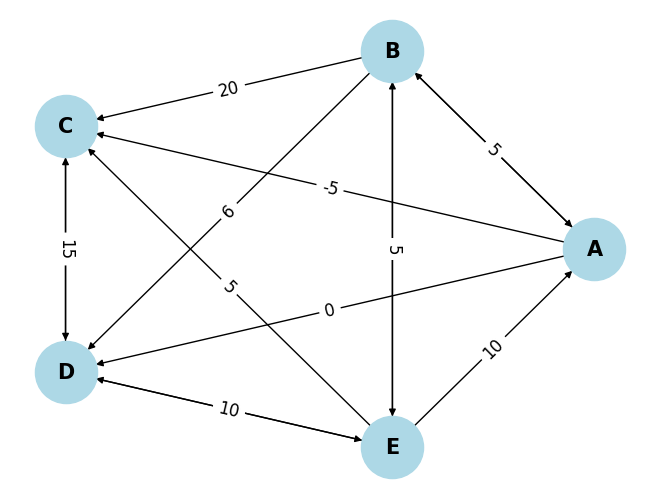

In [40]:
import networkx as nx


W = np.array([
  ['', 5, -5, 0, ''],
  [5, '', 20, 6, 5],
  ['', '', '', 15, ''],
  ['', '', 15, '', 10],
  [10, 5, 5, 10, '']
])

G = nx.from_numpy_array(W, create_using=nx.DiGraph)
mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E'}
G = nx.relabel_nodes(G, mapping)

pos = nx.circular_layout(G)
nx.draw(G, with_labels=True, pos=pos, node_color="lightblue", node_size=2000, font_size=15, font_weight="bold")

labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels, font_size=12)

plt.show()


> __Question 2__ : écrire la configuration initial (le cycle $A-B-C-D-E$) ainsi qu'une fonction de coût adaptée au problème

In [50]:
def energy_tour(tour, W=W):
    total_cost = 0
    for i in range(len(tour)):
        # On récupère l'indice de la ville actuelle et de la prochaine ville dans le tour (avec retour au départ)
        current_city = tour[i]
        next_city = tour[(i + 1) % len(tour)]  # % pour assurer que le dernier revient au premier
        # On additionne le coût (poids) entre la ville actuelle et la prochaine ville
        if not (W[current_city, next_city] == ''):
            total_cost += int(W[current_city, next_city])
    return total_cost

energy_tour([0, 1, 2, 3, 4, 0])


60

> __Question 3__ : écrire une fonction de voisinage adaptée au problème (a priori échanger l'ordre de 2 villes consécutives)

In [148]:
def neighbour_tour(tour):
    # Créer une copie du tour
    new_tour = tour.copy()
    # Choisir aléatoirement deux villes à échanger
    i = random.randint(0, len(tour) - 1)
    j = (i + 1) % len(tour)  # Échanger avec la ville suivante
    # Vérifier si le chemin est valable
    while W[new_tour[i], new_tour[j]] == '':
        i = random.randint(0, len(tour) - 1)
        j = (i + 1) % len(tour)

    # Échanger les deux villes
    new_tour[i], new_tour[j] = new_tour[j], new_tour[i]
    return new_tour

neighbour_tour([0, 1, 2, 3, 4])


[0, 1, 3, 2, 4]

> __Question 4__ : écrire une fonction résolvant le TSP pour notre exemple (normalement on peut faire mieux que le CM)

In [150]:
def simulated_annealing_tour(initial_tour, max_iterations, initial_temperature, cooling_rate):
    current_tour = initial_tour
    current_energy = energy_tour(current_tour)
    temperature = initial_temperature

    tour_values = [current_tour]
    energy_values = [current_energy]

    for _ in range(max_iterations):
        # Générer un nouveau voisin
        new_tour = neighbour_tour(current_tour)
        new_energy = energy_tour(new_tour)

        # Calculer la différence d'énergie
        delta_energy = new_energy - current_energy

        # Accepter la nouvelle solution si elle est meilleure ou avec une probabilité
        if delta_energy < 0 or random.random() < math.exp(-delta_energy / temperature):
            current_tour = new_tour
            current_energy = new_energy

        # Refroidissement de la température
        temperature *= cooling_rate

        # Enregistrer l'historique
        tour_values.append(current_tour)
        energy_values.append(current_energy)

    return tour_values, energy_values

initial_tour = np.array([0, 1, 2, 3, 4])  # Cycle A-B-C-D-E
tour_values, energy_values = simulated_annealing_tour(initial_tour, max_iterations=50, initial_temperature=100, cooling_rate=0.8)
tour_values, energy_values


([array([0, 1, 2, 3, 4]),
  array([0, 1, 3, 2, 4]),
  array([0, 1, 2, 3, 4]),
  array([4, 1, 2, 3, 0]),
  array([1, 4, 2, 3, 0]),
  array([1, 2, 4, 3, 0]),
  array([2, 1, 4, 3, 0]),
  array([2, 4, 1, 3, 0]),
  array([2, 4, 1, 3, 0]),
  array([2, 4, 1, 3, 0]),
  array([2, 4, 3, 1, 0]),
  array([2, 4, 3, 0, 1]),
  array([2, 4, 3, 0, 1]),
  array([1, 4, 3, 0, 2]),
  array([1, 4, 3, 0, 2]),
  array([1, 4, 3, 0, 2]),
  array([1, 4, 3, 0, 2]),
  array([4, 1, 3, 0, 2]),
  array([4, 1, 3, 0, 2]),
  array([4, 1, 3, 0, 2]),
  array([4, 1, 3, 0, 2]),
  array([4, 1, 3, 0, 2]),
  array([1, 4, 3, 0, 2]),
  array([1, 4, 3, 0, 2]),
  array([1, 4, 3, 0, 2]),
  array([4, 1, 3, 0, 2]),
  array([4, 1, 3, 0, 2]),
  array([4, 1, 3, 0, 2]),
  array([4, 1, 3, 0, 2]),
  array([4, 1, 3, 0, 2]),
  array([4, 1, 3, 0, 2]),
  array([4, 1, 3, 0, 2]),
  array([4, 1, 3, 0, 2]),
  array([4, 1, 3, 0, 2]),
  array([4, 1, 3, 0, 2]),
  array([4, 1, 3, 0, 2]),
  array([4, 1, 3, 0, 2]),
  array([4, 1, 3, 0, 2]),
  array([4, 

> __Question bonus__ : écrire le programme afin de visualiser l'évolution pas à pas de l'algorithme.

### À venir : 
TP1b : sudoku et voyageur de commerce bis

### Exposés possibles :

($\star$) comparaison des méthodes du recuit simulé et du gradient

 ($\star$) étude exhaustive de https://machinelearningmastery.com/1d-test-functions-for-function-optimization/ par la méthode du recuit simulé

($\star$) étude poussée de https://fr.wikipedia.org/wiki/Fonction_de_test_pour_l%27optimisation  par la méthode du recuit simulé

 ($\star\star$) création et étude qualitative des images https://en.wikipedia.org/wiki/File:SimulatedAnnealingFast.jpg et https://commons.wikimedia.org/wiki/File:SimulatedAnnealingSlow.jpg

 ($\star\star$) compréhension et réécriture de https://math.stackexchange.com/questions/2096176/are-there-3-disjoint-copies-of-2k-3-3-cup-k-5-5-setminus-c-10-in

 ($\star - \star\star$) exemples tirés de 
http://www.lps.ens.fr/%7Eweisbuch/livre/b9.html